In [1]:
# importing the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Loading the dataset
df_train = pd.read_csv('Health_Insurance_train.csv')
df_test = pd.read_csv('Health_Insurance_test.csv')
df_tst_op = pd.read_csv('sample_submission.csv')

In [3]:
df_train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [4]:
df_test.head()

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297

In [6]:
df_train.shape

(381109, 12)

In [9]:
df_test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

### Steps of operations to be performed on the dataset
1. Look for null values in a dataset
2. Categorical Encoding ['Gender','Vehicle_Age','Vehicle_Damage']
3. Removing the unwantd columns after encoding ['Gender','Vehicle_Age','Vehicle_Damage','id']
4. Choose the model and train the dataset
5. Check the training accuracy_score
6. Predict the output values for testing data
7. Check the accuracy_score for testing data predicted values

In [10]:
# 1. Look for null values in a datase
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [24]:
# 2. Categorical Encoding ['Gender','Vehicle_Age','Vehicle_Damage']
# Gender: 1-Male; 0-Female
# Vehicle_Age: OneHotEncoding
# Vehicle_Damage: 1-Yes; 0-No

def cat_encode(df):
    df['Gender_en'] = np.where(df['Gender']=='Male',1,0)
    df['Vehicle_Damage_en'] = np.where(df['Vehicle_Damage']=='Yes',1,0)
    df['Vehicle_Age_Orig'] = df['Vehicle_Age']
    df = pd.get_dummies(df,columns=['Vehicle_Age'])
    df.drop(['Gender','Vehicle_Age_Orig','Vehicle_Damage','id'],axis=1,inplace=True)    
    return df



In [25]:
# applying the encoding
df1 = df_train.copy()
dt_train = cat_encode(df1)


In [26]:
dt_train.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   44                1         28.0                   0         40454.0   
1   76                1          3.0                   0         33536.0   
2   47                1         28.0                   0         38294.0   
3   21                1         11.0                   1         28619.0   
4   29                1         41.0                   1         27496.0   

   Policy_Sales_Channel  Vintage  Response  Gender_en  Vehicle_Damage_en  \
0                  26.0      217         1          1                  1   
1                  26.0      183         0          1                  0   
2                  26.0       27         1          1                  1   
3                 152.0      203         0          1                  0   
4                 152.0       39         0          0                  0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                     0                     0                      1  
1                     1                     0                      0  
2                     0                     0                      1  
3                     0                     1                      0  
4                     0                     1                      0

In [30]:
dt_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [27]:
# Splitting input and o/p features and oversample to balance the dataset
def sample_class(df):
    from imblearn.over_sampling import ADASYN
    
    X = df.drop('Response',axis=1)
    y = df['Response']
    
    asyn = ADASYN(sampling_strategy=0.7)
    X_new,y_new = asyn.fit_resample(X,y)
    
    return pd.concat([X_new,y_new],axis=1)

In [29]:
d_new= sample_class(dt_train)

In [31]:
X_new =d_new.drop('Response',axis=1)
y_new =d_new['Response']

In [32]:
y_new.value_counts()

0    334399
1    237516
Name: Response, dtype: int64

In [33]:
# Building the model for the training data
def logit(X_train,y_train):
    from sklearn.linear_model import LogisticRegression 
    lr_model = LogisticRegression()
    lr_model.fit(X_train,y_train)
    return lr_model

In [34]:
def decision(X_train,y_train):
    from sklearn.tree import DecisionTreeClassifier
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train,y_train)
    return dt_model

In [35]:
lr_model = logit(X_new,y_new)
lr_model.score(X_new,y_new)

C:\Users\Ultimte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.592002308035285

In [36]:
dt_model = decision(X_new,y_new)
dt_model.score(X_new,y_new)

0.9997954241451964

#### Applying the below techniques to testing dataset and comparing the o/p
1. Categorical encoding

In [46]:
# Applying categorical encoding for testing data
X_test = cat_encode(df_test)
y_test = df_tst_op.drop('id',axis=1).copy()


Accuracy of the o/p is: 0.8042617505136299


C:\Users\Ultimte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultimte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultimte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.80      0.89    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.80    127037
   macro avg       0.50      0.40      0.45    127037
weighted avg       1.00      0.80      0.89    127037



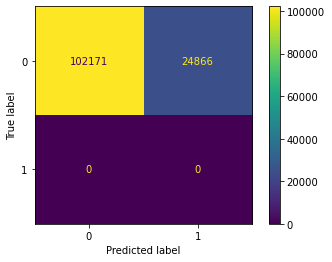

In [52]:
# predicting the output using the LogisticRegression model
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
y_hat = lr_model.predict(X_test)
print(f'Accuracy of the o/p is: {accuracy_score(y_test,y_hat)}')
print(classification_report(y_test,y_hat))
plot_confusion_matrix(lr_model,X_test,y_test,values_format='d')

Accuracy of the o/p is: 0.8540976251013485


C:\Users\Ultimte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultimte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultimte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.85    127037
   macro avg       0.50      0.43      0.46    127037
weighted avg       1.00      0.85      0.92    127037



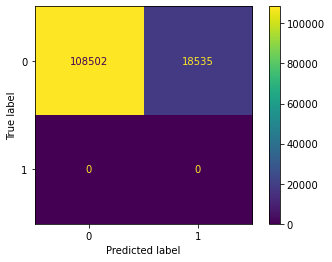

In [72]:
# predicting the output using the LogisticRegression model
#from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
y_pred = dt_model.predict(X_test)
print(f'Accuracy of the o/p is: {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
plot_confusion_matrix(dt_model,X_test,y_test,values_format='d')

In [73]:
# Exporting the output values along with id
y = pd.Series(data=y_pred,name='DT_predicted')
y_p = pd.concat([df_tst_op['id'],y],axis=1)
y_p.to_csv('Prediction_result_HealthInsurance.csv')
